# 02. Списки и деревья

<div style="text-align: right"> 
    
    Лекция 1.2 04/02/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## 02.1 Списки в языке Haskell

Используются именно списки, а не массивы, поэтому операция индексации происходит гораздо более медленнее, чем в массивах (`O(n)` вместо `O(1)`).

- `[]` - пустой список, пустая ссылка в других языках программирования
- списки являются однородной структурой, элементы должны быть одного и того же типа

In [2]:
[1, 2, 3]

[1,2,3]

- `1:[2,3]` - конструктор - присоединение головного элемента к списку.

**Конструктор** не делает никаких преобразований над значениями - получившуюся конструкцию всегда можно разобрать - мы всегда сможем присоединить и , что более важно, отсоъединить голову.

**Функции** - выдают совершенно новый объект, который нельзя разделить машинным образом.

In [3]:
1:[2,3]

[1,2,3]

`1:(2:(3:[]))`  -- создание списка с помощью конструктора ':' и пустого списка. В некотором смысле константы являются *костнукторами* - **конструкторами констант**

In [4]:
1:(2:(3:[]))

Line 1: Use list literal
Found:
1 : (2 : (3 : []))
Why not:
[1, 2, 3]

[1,2,3]

- `[1..n]` - создание списка с помощью арифметической прогрессии, шаг единица

- `[2, 4..20]` - арифметическая прогрессия с заданной разностью, которая задаётся **2**-мя первыми элементами

Кортежи содержат определенное количество элементов, в списке мы не знаем количества элементов заранее.

**Типы списков**

- `[Integer]` - список и целых чисел: `[1..10]`
- `[Char]` - список из символов (строка: `"List" == ['L','i','s','t']`)
- `[(Char, Int)]` - список из кортежей: `[('L', 1), ('i', 2), ('s', 3)]`
- `[[Int]]`      -- список из списков: `[[1, 2], [3, 5..10], []]`

**Функция суммирования элементов списка**

Сами можем описывать функции обработки списков. В качестве образцов будем использовать **конструкторы**.

In [6]:
sumList       ::  [Integer] -> Integer
sumList []    =   0 -- если пустой список, то 0
sumList (x:s) =   x + sumList s -- если результат составлен с помощью конструктора
-- голова:хвост (кроме пустого), то выделяем голову и хвост

Line 2: Use foldr
Found:
sumList [] = 0
sumList (x : s) = x + sumList s
Why not:
sumList s = foldr (+) 0 s

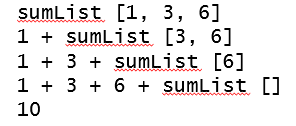

Так производится сопоставление образцов.

In [8]:
sumList [1..100]

5050

**Кортеж** - тоже конструктор.

In [9]:
factorial          ::  Integer -> Integer
prodList'          ::  [Integer] -> Integer -> Integer
factorial n         =  prodList' [1..n] 1
prodList' [] p      =  p
prodList' (x:ls) p  =  prodList' ls (p*x)     -- концевая рекурсия

Line 4: Use foldl
Found:
prodList' [] p = p
prodList' (x : ls) p = prodList' ls (p * x)
Why not:
prodList' ls p = foldl (*) p ls

**Несколько стандартных операций над списком и их определения.**

- голова списка

In [13]:
head          :: [a] -> a -- на вход список, на выходе - число
head (x:ls)   =  x -- выдаем голову
head []       =  error "head: empty list"

- хвост списка (всё без головы)

In [14]:
tail          :: [a] -> [a] -- хвост списка
tail (x:ls)   =  ls
tail []       =  error "tail: empty list"

- длина списка

In [15]:
length        :: [a] -> Int -- количество элементов
length (x:ls) =  1 + length ls
length []     =  0

Line 2: Use foldr
Found:
length (x : ls) = 1 + length ls
length [] = 0
Why not:
length ls = foldr (\ x -> (+) 1) 0 ls

Время работы пропорционально длине списка.

- пустой или нет список

In [17]:
null          :: [a] -> Bool -- пустой список или нет
null (x:ls)   =  False
null []       =  True

- последний элемент списка

In [18]:
last          :: [a] -> a --последний элемент списка
last []       =  error "last: empty list"
last [x]      =  x -- если список из одного элемента, то возвращаем последний
last (x:ls)   =  last ls -- рекурсивный вызов

In [10]:
last [4, 7, 10, 3]

3

- без последнего элемента

In [19]:
init          :: [a] -> [a] -- удалить последний
init []       =  error "init: empty list"
init [x]      =  []
init (x:ls)   =  x : init ls

In [8]:
init [1..10]

[1,2,3,4,5,6,7,8,9]

- индексация списка

In [18]:
(!!)          :: [a] -> Int -> a -- индексация, a - переменная типа
[] !! _       =  error "(!!): empty list"
(x:ls) !! 0   =  x
(x:ls) !! n   =  ls !! (n-1)

In [19]:
[1,2,3] !! 1

2


- список индексируется коротким целым `Int`!!
- нумерация начинается с нуля
- если больше длины списка, то ошибка
- в обозначение типа используется Переменные типа

- конкатенация

в качестве первого операнда берем более короткий, второй операнд становится неизменным

In [25]:
(++)          :: [a] -> [a] -> [a] --соединение списка
[] ++ ls      =  ls
(x:l1) ++ l2  =  x : (l1 ++ l2)

In [21]:
[1,2,3] ++ [4,10]

[1,2,3,4,10]

In [28]:
[4, 10] ++ [1, 2, 3]

[4,10,1,2,3]

- разворот списка

In [29]:
reverse       :: [a] -> [a] --развернуть список
reverse'      :: [a] -> [a] -> [a] 
reverse ls         = reverse' ls []
reverse' [] l      = l
reverse' (x:ls) l  = reverse' ls (x:l)

Line 4: Use foldl
Found:
reverse' [] l = l
reverse' (x : ls) l = reverse' ls (x : l)
Why not:
reverse' ls l = foldl (flip (:)) l ls

In [30]:
reverse [1..10]

[10,9,8,7,6,5,4,3,2,1]

Списки в Haskell - аналогия `LinkedList`. Все значения представлены указателями.

- суммирование

- `Num a=> [a] -> a` - сторож, тип a принадлежит классу Num, если операция разрешена, то можно складывать

In [31]:
sum         :: Num a => [a] -> a 
sum []       =  0
sum (x:t)    =  x + sum t

Line 2: Use foldr
Found:
sum [] = 0
sum (x : t) = x + sum t
Why not:
sum t = foldr (+) 0 t

In [32]:
sum [1, 2, 3]

6

- взять `n` элементов списка

In [62]:
take              :: Int -> [a] -> [a]
take _ []          =  [] -- первый аргумент - количество
take n _ | n <= 0  =  [] -- если n < 0
take n (x:t)       =  x : take (n-1) t

In [65]:
take (-1) [1,2,3]

Line 1: Take on a non-positive
Found:
take (- 1) [1, 2, 3]
Why not:
[]

[]

- взять максимум списка

Максимального элемента у пустого списка не существует. Используется функция - `max(a, b)` - максимум из двух.

In [67]:
maximum        :: Ord a => [a] -> a
maximum []      =  error "maximum: empty list"
maximum [x]     =  x
maximum (x:t)   =  max x (maximum t)

- соединение в пары `zip`, часто используется

In [68]:
zip                  :: [a] -> [b] -> [(a, b)]
zip [] _             =  []
zip _ []             =  []
zip (e1:t1) (e2:t2)  =  (e1, e2) : zip t1 t2

In [69]:
zip [1, 2, 3] ['a', 'b', 'z']

[(1,'a'),(2,'b'),(3,'z')]

In [70]:
zip [1, 2, 3] ['a', 'b']

[(1,'a'),(2,'b')]

- список из пар

Используется конструкция `where`, локально сопоставимая с образцом.

- `fst`, `scnd` - first и second

In [3]:
unzip             :: [(a,b)] -> ([a],[b]) 
unzip []           = ([], [])
unzip ((e1,e2):t)  = (e1:tail1, e2:tail2) where (tail1,tail2) = unzip t

In [4]:
cor = unzip (zip [1, 2, 3] ['a', 'b', 'c', 'd'])
cor

([1,2,3],"abc")

In [5]:
:t cor

cor :: forall a. Num a => ([a], [Char])